# 7. 군집화

In [1]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 01. K-평균 알고리즘 이해

군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘

- 군집 중점(centroid)이라는 특정한 임의의 지점을 선택해 가장 가까운 포인트들을 선택하는 기법
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고, 이동된 중심점에서 다시 가까운 포인트를 선택  
다시 중심점을 평균 지점으로 이동하는 프로세스 반복 수행

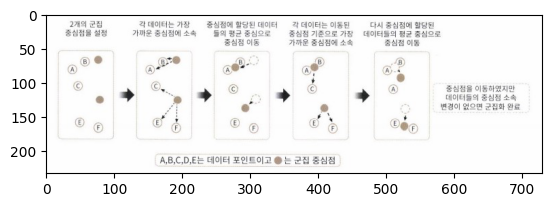

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/K평균알고리즘.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**< K-평균 동작 과정 >**

1. **군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에**  
전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 놓는다.

2. **각 데이터는 가장 가까운 곳에 위치한 중심점에 소속된다.**  
그림에서는 A, B // C, E, F 같은 중심점

3. **소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동**  
그림에서는 A, B가 포인트의 평균 위치로 중심점 이동 // C, E, F역시 데이터 포인트의 평균 위치로 이동

4. **각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 그곳으로 소속 변경**  
그림에서는 C 데이터가 기존 중심점보다 더 가까운 중심점으로 소속 변경

5. **다시 중심을 소속된 데이터의 평균 중심으로 이동**  
C가 중심 소속이 변경되면서 E, F 두개의 줌심이 모두 이동

6. **중심점 이동 후 데이터 중심점 소속 변경이 없으면 군집화 종료**

**< K-평균 장점 >**  

- 일반적인 군집화에서 가장 많이 활용
- 알고리즘이 쉽고 간결

**< K-평균 단점 >**

- 거리 기반 알고리즘으로, 속성의 개수가 많을 경우 군집화 정확도 하락. (PCA를 통한 차원 감소가 필요)

- 반복을 수행하기 때문에 반복 횟수가 많으면 수행시간이 오래 걸림

- 몇 개의 군집(Cluster)을 선택해야 할지 가이드하기 어려움


### 사이킷런 KMeans 클래스 소개



```
class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                            precompute_distance='auto', verbose=0, random_state=None, copy_x=True, 
                            n_jobs=1, algorithm='auto') 
```



- **n_clusters** : 군집화 개수(군집 중심점 개수)
- **init** : 초기에 중심점의 좌표를 설정할 방식 > 보통은 k-means++
- **max_iter** : 최대 반복 횟수 > 이 횟수에 도달하기 전에도 중심점 이동이 없으면 종료
- **labels_** : 각 데이터 포인트가 속한 군집 중심점 레이블
- **clustercenters** : 각 군집 중심점 좌표 > 군집 중심점 좌표가 어디인지 시각화 가능

### K-평균을 이용한 붓꽃 데이터 세트 군집화

꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인, 분류 값과 비교

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


iris 데이터 세트를 3개 그룹으로 군집화  
→ n_cluster=3, k-means++, max_iter=300   
→ fit 수행

In [7]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans의 labels_ 속성을 확인해 iris 각 데이터가 어떤 중심에 속하는지 확인


In [9]:
print(kmeans.labels_) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


0, 1, 2 값으로 되어 있는 labels_ 값을 'cluster' 칼럼으로 DF에 추가


In [10]:
irisDF['cluster']=kmeans.labels_

군집화가 효과적으로 됐는지 확인  
→ group by 연산을 실제 분류 값인 target과 군집화 분류 값인 cluster 레벨로 적용  
→ target, cluster 값 개수 비교

In [11]:
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result) 

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 타겟 0 → 1번 군집으로 그루핑
- 타겟 1 → 2개만 2번으로, 나머지는 0번으로 그루핑
- 타겟 2 → 14개가 0번에, 나머지 36개가 2번으로 그루핑

iris 군집화 시각화 → PCA를 이용해 4개 속성을 2차원으로 축소한 뒤 X, Y 좌표로 개별 데이터 표현


In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:, 1]
irisDF.head() 

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


cluster 0 동그라미 // cluster 1 네모 // cluster 2 세모 산점도 표현


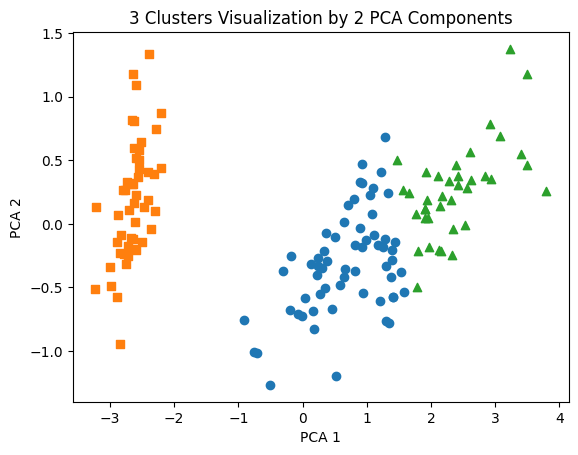

In [13]:
# 군집 값이 0,1, 2인 경우마다 별도 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출 // 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show() 

- cluster 1(네모)는 명확히 분리가 잘 되어 있음
- cluster 0(동그라미)와 cluster 2(세모)도 잘 분리되어 있지만 네모만큼은 아님

### 군집화 알고리즘 테스트를 위한 데이터 생성

군집화용 데이터 생성기 make_blobs(), make_classification()

**make_blobs()**

> 여러 개의 클래스에 해당하는 데이터 새트 생성, 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음. 

**make_classification()**

> 여러 개의 클래스에 해당하는 데이터 세트 생성, 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

**make_circle()**, **make_moon()**

> 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용

**make_blobs()** : 호출 시 피처, 타겟 데이터 세트가 튜플로 반환됨

- **n_samples** : 생성할 총 데이터 개수 / 디폴트 100

- **n_features** : 데이터의 피처 개수 / 시각화를 목표로 할 경우 2개 설정 - x, y 좌표상 표현

- **centers** : init 값 / 숫자로 설정 시 군집의 개수, ndarray 형태로 표현시 개별 군집 중심점의 좌표

- **cluster_std** : 생성될 군집 데이터의 표준편차 / 0.8로 설정하면 군집 내의 표준 편차 [0.8, 1.2, 0.6]으로 표현하면 1,2,3번째 군집 내 표준편차

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts=np.unique(y, return_counts=True)
print(unique, counts) 

(200, 2) (200,)
[0 1 2] [67 67 66]


피처 세트 X는 200개 레코드, 2개 피처를 가져서 shape이 (200, 2)
군집 타겟 데이터 세트인 y의 shape은 (200, )
3개 cluster 값은[0, 1, 2]이고 각각 67 67 66개로 균일하게 구성된다.

데이터 가공을 편리하게 하기 위해 DataFrame으로 변환 → 피처 이름 ftr1, ftr2



In [15]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head() 

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


make_blob으로 만든 피처 데이터 세트가 어떤 군집화 분포를 가지고 있는지 확인  
타겟값 0,1,2에 따라 마커를 다르게 해서 산점도를 그려보았다.

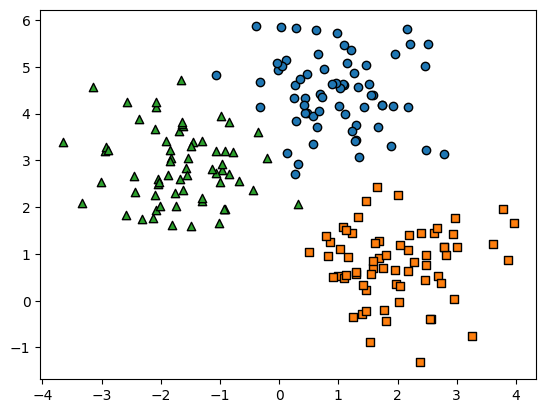

In [16]:
target_list=np.unique(y)
# 각 타겟별 산점도 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 > target_list=[0,1,2]
for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show() 

KMeans 군집화를 수행한 뒤 군집별로 시각화  
→ fit_predict( ) 수행해 피처 데이터 세트 X를 군집화, kmeans_label 칼럼으로 저장

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


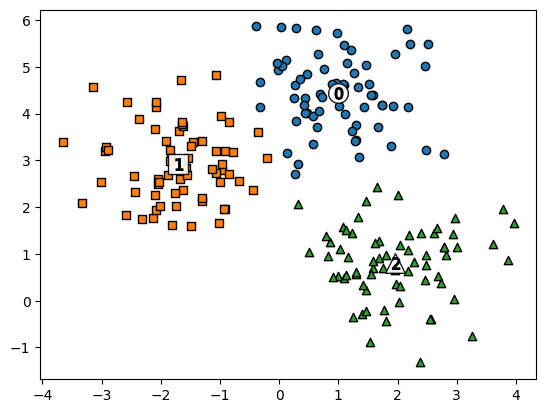

In [17]:
# KMeans 객체를 이용해 X 데이터 K-Means 클러스터링
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 마커별로 산점도 그림
for label in unique_labels:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', 
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label) 

plt.show() 

make_blobs 타겟과 kmeans_label은 군집 번호를 의미하기 때문에 서로 다른 값으로 매핑될 수 있음  
→ 산점도의 마커가 서로 다를 수 있음

In [19]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts()) 

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


make_blobs는 cluster_std 파라미터로 데이터 분포도를 조절함  
→ std가 작을수록 군집 중심에 데이터가 모여 있으며 클수록 데이터가 퍼져 있음

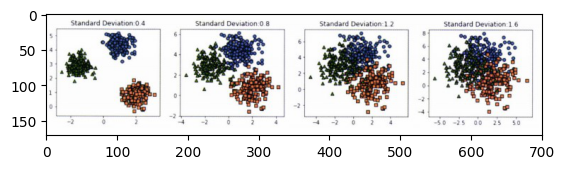

In [23]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/make_blobs.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

## 02. 군집 평가 (Cluster Evaluation)

대부분의 군집화는 앞의 예제처럼 타겟 레이블이 없음. **비교할만한 타겟 레이블을 갖고 있지 않다.**

데이터 내에 숨어 있는 별도의 그룹을 찾아 의미부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가짐

군집화의 성능을 평가하기 위해 **실루엣 분석** 이용

### 실루엣 분석의 개요

**실루엣 분석(silhouette analysis)** : 각 군집 간의 거리가 얼마나 효율적으로 분리돼어 있는지 나타냄

- 다른 군집과의 거리가 떨어져있고, 같은 군집끼리는 잘 뭉쳐 있으면 효율적으로 분리됐다고 말한다.

- 실루엣 계수(silhouette coefficient)를 기반으로 실루엣 분석을 수행.

※ **실루엣 계수** : 개별 데이터가 가지는 군집화 지표  
→ 다른 군집과 얼마나 떨어져있고 같은 군집끼리 얼마나 붙어있는지 나타내는 지표

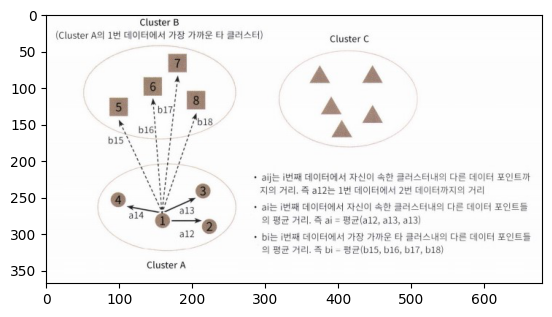

In [21]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/실루엣분석.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- **a(i)** : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리 평균값
- **b(i)** : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균값
- **b(i) - a(i)** : 두 군집간의 거리
- **MAX(a(i), b(i))** 값으로 나눠 정규화
- **s(i)** : i번째 실루엣 계수 값

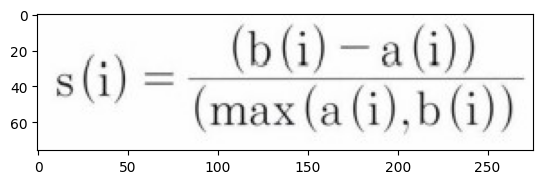

In [22]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/실루엣계수.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**실루엣 계수**는 **-1과 1 사이의 값**으로, 1과 가까울수록 근처의 군집과 더 멀리 떨어져 있고, 0에 가까울수록 근처의 군집과 가깝고 -는 아예 다른 군집에 데이터 포인트가 할당됨을 의미



**< 좋은 군집화의 조건 >**

- 전체 실루엣 계수의 평균값, 사이킷런의 silhouette_score 값은 0~1 사이의 값을 가지고 1에 가까울수록 좋다

- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다.  
→ 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요



### 붓꽃 데이터 세트를 이용한 군집 평가

silhouette_samples, silhouette_score 이용

In [24]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값 계산
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 계산
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('iris 데이터 세트 실루엣 분석 score: {0:.3f}'.format(average_score))
irisDF.head() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_samples( ) return 값의 shape (150,)
iris 데이터 세트 실루엣 분석 score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


평균 실루엣 계수 값 0.5 → 1번 군집의 경우 0.8로 높은 실루엣 계수 값이 나옴

군집별 평균 실루엣 계수 값 확인 → 군집 칼럼별로 group by해 silhouette coeff 칼럼의 평균값 계산


In [25]:
irisDF.groupby('cluster')['silhouette_coeff'].mean() 

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다.

**개별 군집별로 적당한 거리를 유지하면서 군집 내의 데이터가 서로 뭉쳐 있는 경우에 KMeans의 적절한 군집 개수가 설정됐다고 판단한다.**



Automatically created module for IPython interactive environment


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


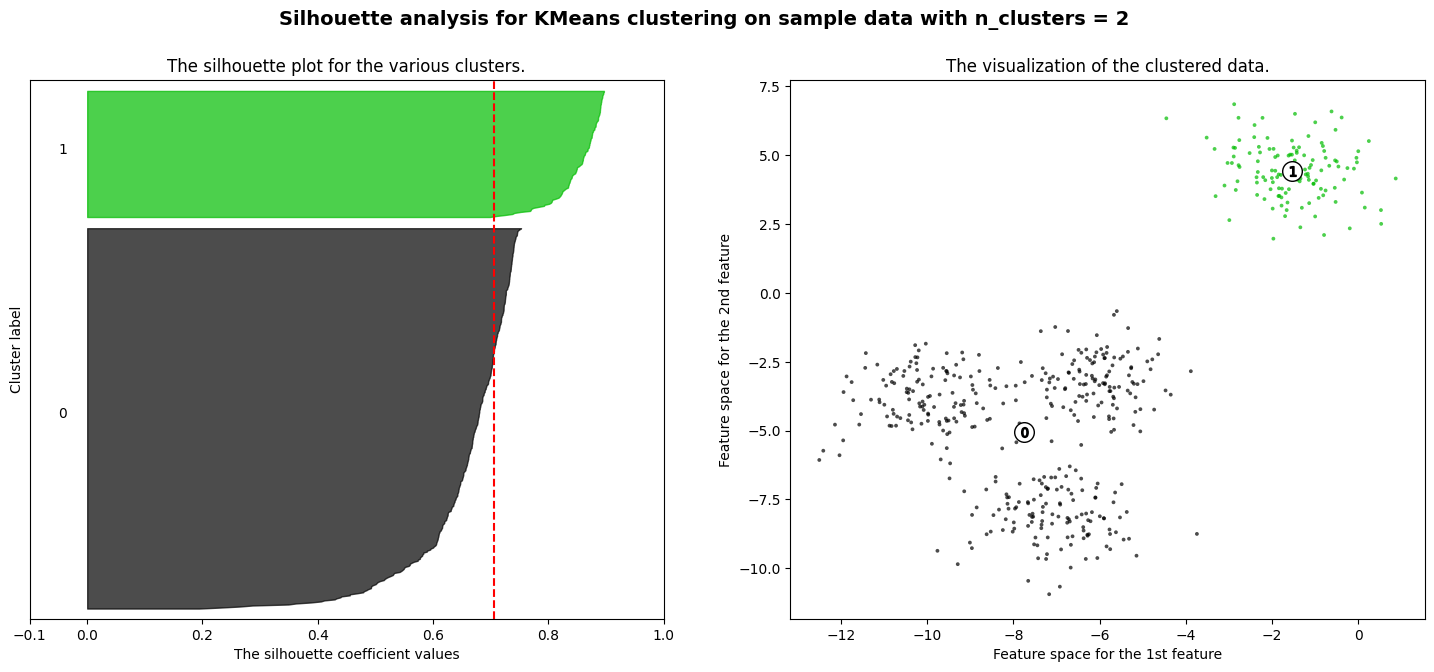

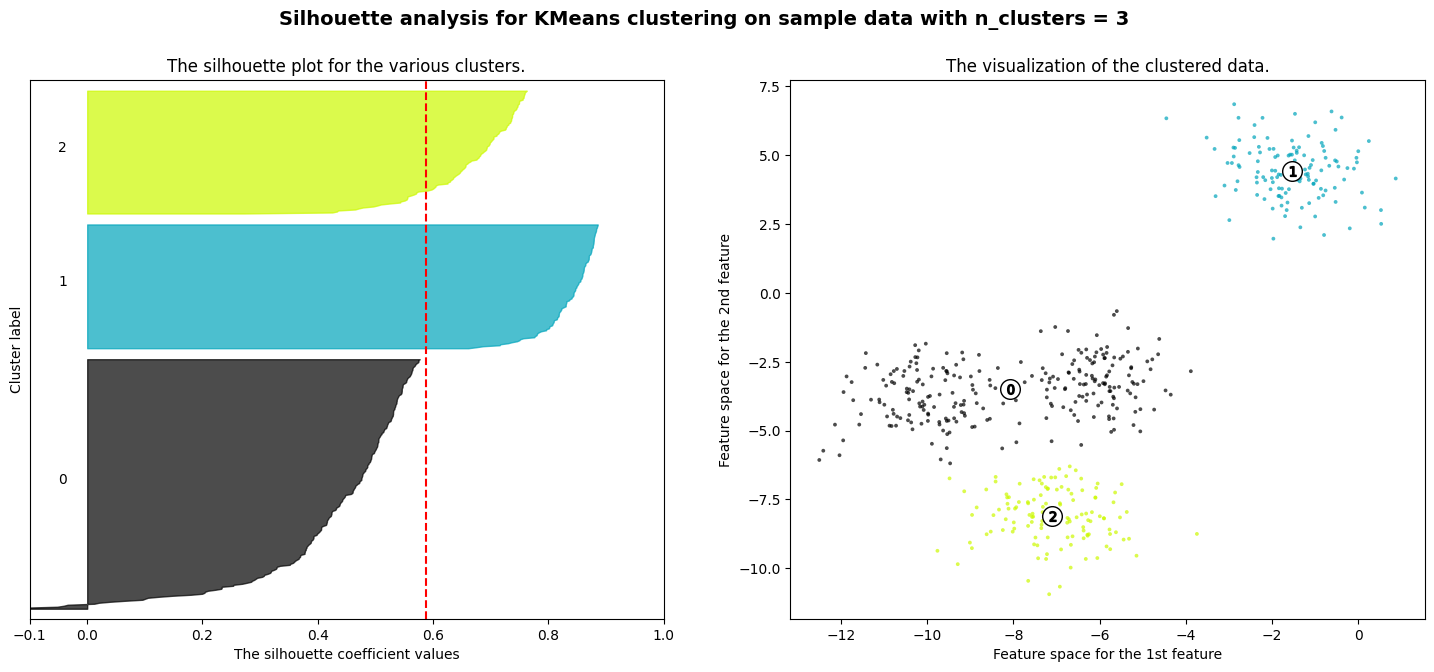

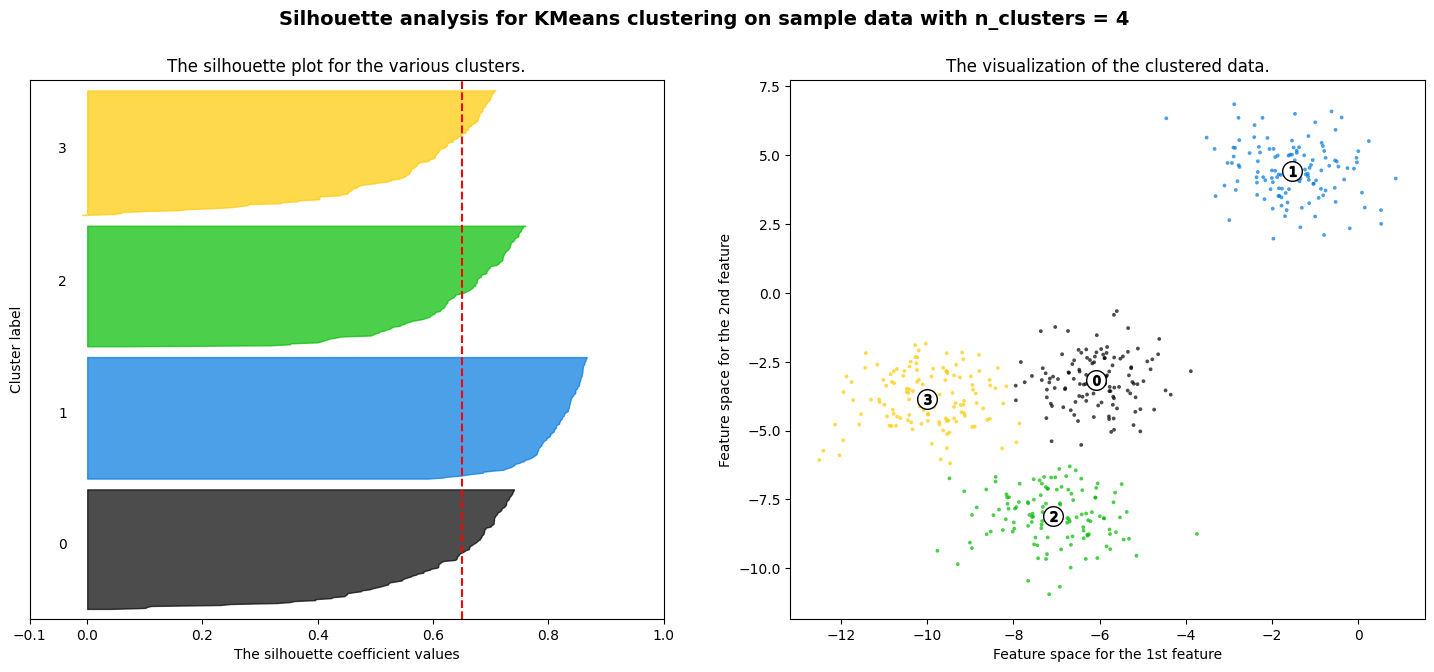

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show() 

## 03. 평균 이동

### 평균 이동(Mean Shift)의 개요

**평균 이동은 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행**

- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

- 평균 이동 알고리즘은 특정 대역폭(bandwidth)을 가지고 최초의 확률 밀도 중심 C0 내에서 데이터의 확률 밀도 중심이 더 높은 곳으로 중심 이동


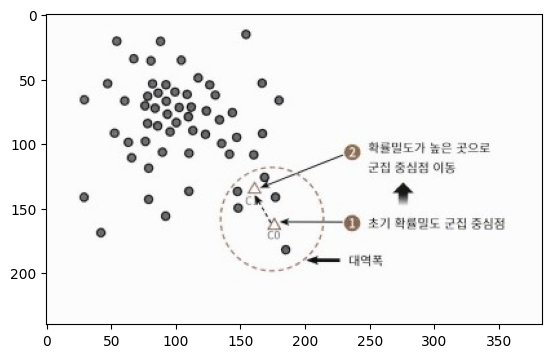

In [33]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/평균이동1.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 평균 이동은 데이터의 분포도를 이용해 군집 중심점을 찾기 때문에 확률밀도함수를 이용한다.

- 주어진 모델의 pdf를 찾기 위해 KDE(Kernel Density Estimatio)를 이용한다.

- 임의의 포인트에서 시작해 이러한 피크 포인트를 찾을 때까지 KDE를 반복적으로 적용하며 군집화 수행


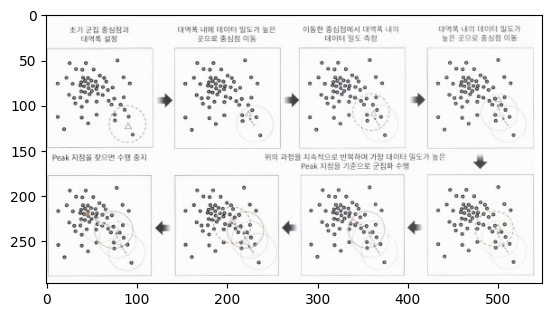

In [34]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/평균이동2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- **k-평균과 다르게 군집 개수를 지정할 필요 없이 알고리즘 자체에서 군집 개수를 최적으로 설정**

- 대역폭 크기를 어떤 값으로 설정하느냐에 따라 군집화의 품질이 결정!



**< MeanShift 클래스로 평균 알고리즘 >**

In [27]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift=MeanShift(bandwidth=0.9)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2 3 4 5 6 7]


군집이 8개로 분류됨 → 지나치게 세분화 됨!  

일반적으로 bandwidth를 작게 할수록 군집 개수가 많아진다.

In [28]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2]


bandwidth를 1로 키웠더니 3개로 잘 군집화 됐음.

데이터의 분포 유형에 따라 bandwidth 값의 변화는 군집화 개수에 큰 영향을 미칠 수 있기 때문에  
**MeanShift에서는 bandwidth 값을 최적화로 설정하는 것이 매우 중요**

최적화된 bandwidth 값을 찾기 위해 estimate_bandwidth( ) 제공

In [29]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X, quantile=0.2)
print('bandwidth 값:', round(bandwidth, 3)) 

bandwidth 값: 1.444


측정된 bandwidth를 평균 이동 입력값으로 적용해 동일한 데이터 세트에 군집화 수행

In [30]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

# estimate_bandwidth 로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X, quantile=0.25)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2]


3개의 군집을 시각화 → cluster_centers_로 군집 중심 좌표 표현 가능

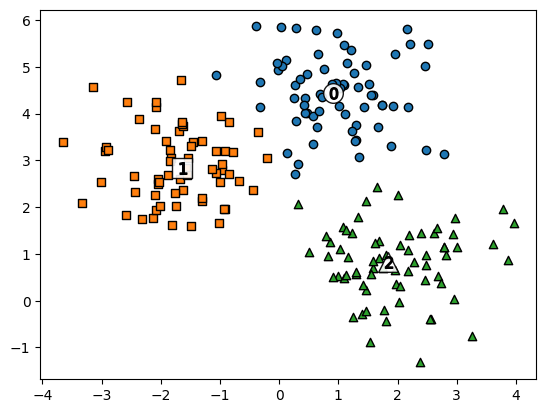

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster=clusterDF[clusterDF['meanshift_label']==label]
    center_x_y=centers[label]
    # 군집별로 다른 marker로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', 
               alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
               marker='$%d$'%label)
    
plt.show() 

타겟 값과 레이블 값 비교 → 대부분 1:1로 잘 매칭됨

In [32]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts()) 

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


**평균 이동**은 데이터 세트를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 **유연한 군집화**가 가능하다. 이상치의 영향력도 크지 않으며 미리 군집의 개수를 정할 필요도 없다.

하지만 알고리즘의 수행 시간이 오래 걸리며 bandwidth에 따른 군집화 영향도가 매우 크다.

따라서 평균 이동 군집화 기법은 컴퓨터 비전 영역에서 잘 사용된다. 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행!

## 04. GMM (Gaussian Mixture Model)

### GMM (Gaussian Mixture Model) 소개

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식

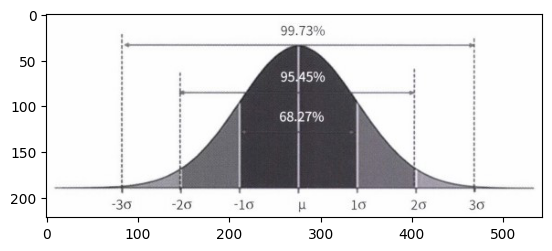

In [35]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/GMM.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 평균을 중심으로 높은 데이터 분포도를 가지고 있으며 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 96.45%를 가지고 있다.

- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주, 섞인 데이터 분포에서 개별 유형의 가우시안 분포 추출

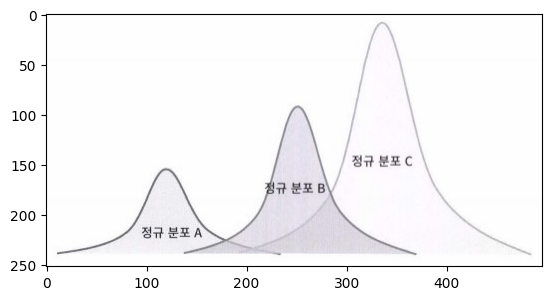

In [36]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/GMM2.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 세 개의 가우시안 분포가 있을 때 합친다면 아래와 같은 형태가 됨

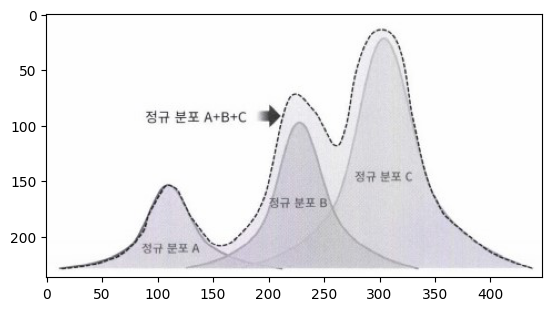

In [37]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/GMM3.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 군집화를 수행하려는 실제 데이터 세트의 분포가 다음과 같다면 쉽게 이 데이터 세트가 정규분포 3개를 합쳐서 만든 분포임을 알 수 있음

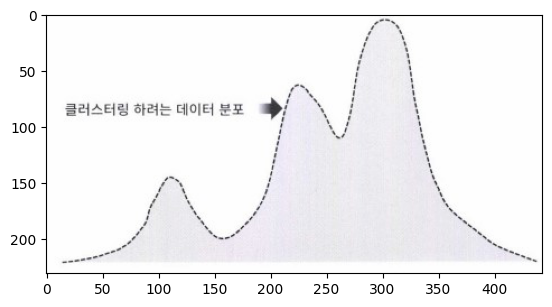

In [38]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/GMM4.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- 전체 데이터 세트는 서로 다른 정규분포 형태를 가진 여러가지 확률 분포 곡선으로 구성될 수 있으며 이러한 서로 다른 정규분포에 기반해 군집화를 수행하는 것이 **GMM 군집화 방식**

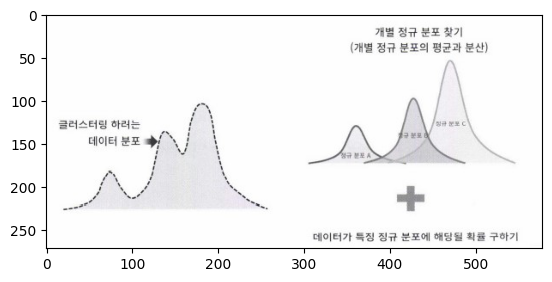

In [39]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/GMM5.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

- GMM에서 이와 같은 방식을 모수추정이라고 하는데, 대표적으로 2가지를 추정하는 것  
■ 개별 정규분포의 평균과 분산  
■ 각 데이터가 어떤 정규분포에 해당되는지 확률

- 위의 모수추정을 위해 EM(Expectation and Maximization) 방법 적용 → Gaussian Mixture 클래스


### GMM을 이용한 붓꽃 데이터 세트 군집화

GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화 → 두 가지 방식으로 군집화 수행한 뒤 비교



In [40]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_lenght', 'petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DF로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

GMM에서 가장 중요한 초기화 파라미터 n_components : gaussian mixture 모델의 총 개수

n_components=3으로 설정하고 fit, predict 수행해 군집을 결정, gmm_cluster 칼럼으로 저장하고 어떻게 군집화됐는지 확인

In [41]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과를 irisDF의 gmm_cluster 칼럼으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# 타겟 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result) 

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


타겟 0, 1은 클러스터 0, 1로 잘 분류됐지만 2의 10%가 타겟 1로 잘못 분류됨  
→ 그래도 kmeans 보다는 나은 결과임

In [42]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result) 

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### GMM과 K-평균의 비교

**KMeans**는 원형 범위 내에서 군집화를 수행하고, 데이터가 원형의 범위를 가질수록 군집화 효율이 높아진다.

- 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함


군집 시각화를 위한 함수 **visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True)**

- **clusterobj** : 사이킷런의 군집 수행 객체 (fit, predict로 군집화를 완료한 객체)  
→ 군집화 결과가 시각화가 아니고 make_blobs로 생성한 데이터의 시각화인 경우 None 입력

- **dataframe** : 피처 데이터 세트와 label 값을 가진 DF

- **label_name** : 군집화 결과 시각화일 경우 DF 내의 군집화 label 칼럼 명, make_blobs 결과 시각화인 경우 DF 내의 target 명

- **iscenter** : 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 True, 아니면 False

In [43]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show() 

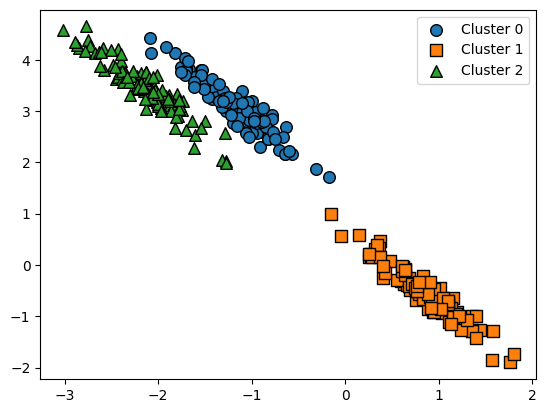

In [44]:
from sklearn.datasets import make_blobs

# make_blobs 로 300개 데이터 세트, 3개 군집 세트, std=0.5 
X, y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation=[[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso=np.dot(X, transformation)
# feature 데이터 세트와 make_blobs의 y결과를 DF로 저장
clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
# 생성된 데이터 세트를 타겟별로 다른 마커로 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False) 

위와 같은 데이터 세트에서는 KMeans의 군집화 정확성이 떨어진다.  
KMeans가 데이터 세트를 어떻게 군집화 했는지 확인

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


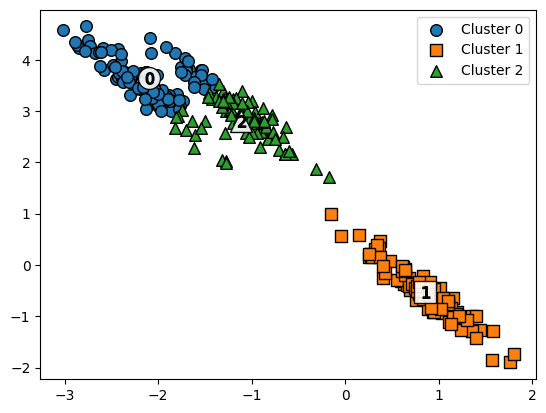

In [45]:
# 3개의 군집 기반 KMeans를 X_aniso에 적용
kmeans=KMeans(3, random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True) 

KMeans로 군집화 수행할 경우 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음  
평균 거리 기반으로 군집화를 수행 → 위처럼 길쭉한 방향으로 데이터가 밀접한 경우엔 최적화 어려움


GMM으로 군집화 수행

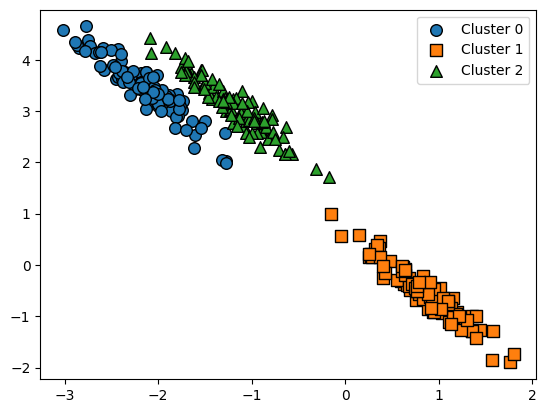

In [46]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터에 적용
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter=False
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False) 

데이터가 분포된 방향에 따라 정확하게 군집화됨

GMM은 K-평균과 다르게 군집의 중심 좌표를 알 수 없기 때문에 군집 중심 표현이 시각화되지 않음


KMeans, GMM의 군집 label 값을 서로 비교해 얼만큼의 효율 차이가 발생하는지 확인

In [47]:
print('#### KMeans Clustering ####')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n#### Gaussian Mixture Clustering ####')
print(clusterDF.groupby('target')['gmm_label'].value_counts()) 

#### KMeans Clustering ####
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

#### Gaussian Mixture Clustering ####
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


KMeans의 경우 타겟 1만 명확히 분류 // GMM의 경우 모든 타겟 명확히 분류

GMM이 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만, 군집화를 위한 수행 시간이 길다

## 05. DBSCAN (Density Based Spatial Clustering of Applications with Noise)

### DBSCAN 개요

밀도 기반 군집화의 대표적인 알고리즘

- 간단하고 직관적인 알고리즘임에도 불구하고 **특정 공간 내의 데이터 밀도 차이를 기반 알고리즘**으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.


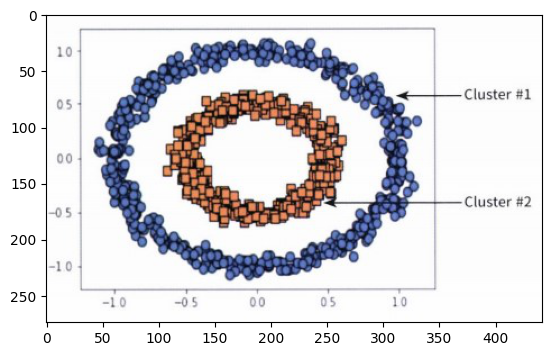

In [57]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/DBSCAN.jpg')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

**< 중요한 두가지 파라미터 >**
- **입실론 주변 영역(epsilon)** : 개별 데이터를 중심으로 입실론 반경을 가지는 원형 영역

- **최소 데이터 개수(min points)** : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

> 핵심 포인트(Core Point) : 주변 영역 내 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우의 데이터

> 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터

> 경계 포인트(Border Point) : 주변 영역 내 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지는 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터

> 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터



**DBSCAN은 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터(핵심 포인트)를 연결하면서 군집화를 구성하는 방식**

**< 사이킷런 DBSCAN 클래스 파라미터 >**
- **eps** : 입실론 주변 영역의 반경
- **min_samples** : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 최소 데이터 개수(자신 포함)


### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [48]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head() 

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result) 

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


군집 레이블 -1은 Noise point > 0과 1 두개의 군집으로 군집화 됐음

DBSCAN은 군집 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집 개수 지정은 무의미하다

DBSCAN으로 군집화 데이터를 2차원 평면에서 표현하기 위해 PCA로 2개 피처로 차원 축소

visualize_cluster_plot으로 시각화

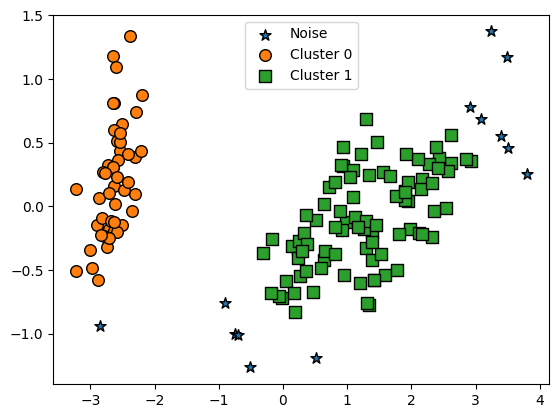

In [50]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2 피처 데이터 세트 변환
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
# visualize_cluster_plot 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA로 칼럼 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]
 
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False) 

별은 Noise 값 → PCA를 이용해 2차원으로 표현하면 Noise 데이터가 명확히 드러난다

**DBSCAN을 적용할 땐 군집 개수를 지정하지 않고 적절한 eps, min_samples로 최적의 군집을 찾는게 중요**

eps를 크게 하면 반경이 커져 포함하는 데이터가 많아 노이즈 데이터가 줄어들고  
min_samples를 크게 하면 주어진 반경에서 더 많은 데이터를 포함시켜야 해서 노이즈 데이터가 늘어난다.


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


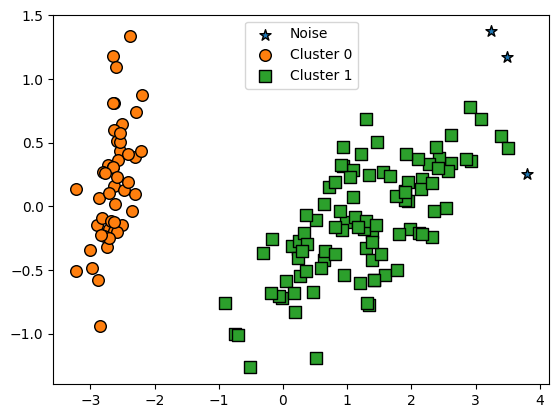

In [51]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result) 

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False) 

eps를 0.6에서 0.8로 키웠더니 노이즈 데이터 개수가 13개에서 3개로 줄었음¶


target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


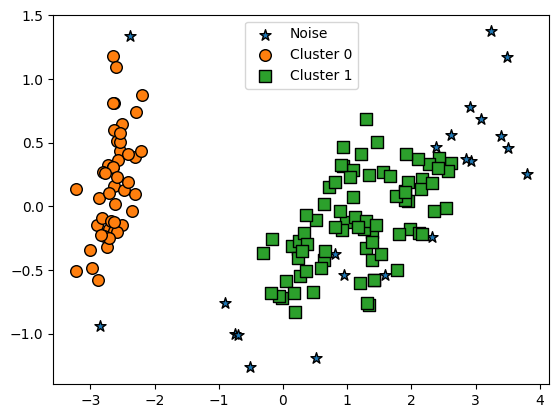

In [52]:
dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False) 

min_samples를 8개에서 16개로 키웠더니 노이즈 데이터가 늘어났음

### DBSCAN 적용하기 - make_circles() 데이터 세트

make_circles 함수를 이용해 내부, 외부 원 2개로 되어 있는 2차원 데이터 세트 생성

- make_circles 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수 지정은 필요 없음
- 파라미터 noise는 노이즈 데이터 세트의 비율, factor는 내부와 외부 원의 scale 비율

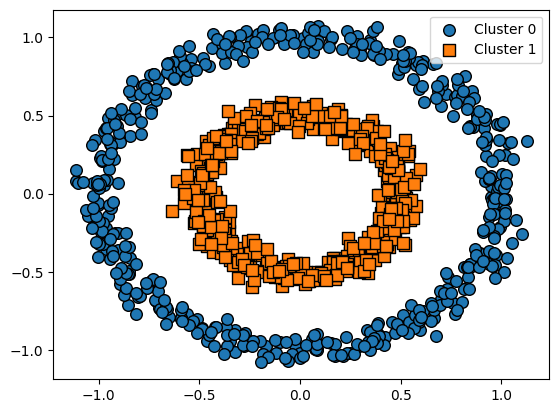

In [53]:
from sklearn.datasets import make_circles

X, y=make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False) 

KMeans가 위의 데이터를 어떻게 군집화 하는지 확인


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


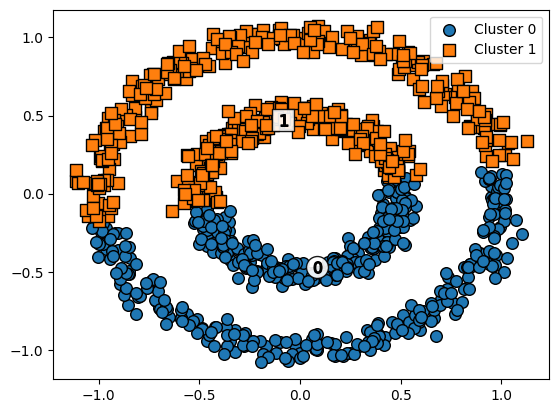

In [54]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True) 

GMM이 어떻게 군집화하는지 확인

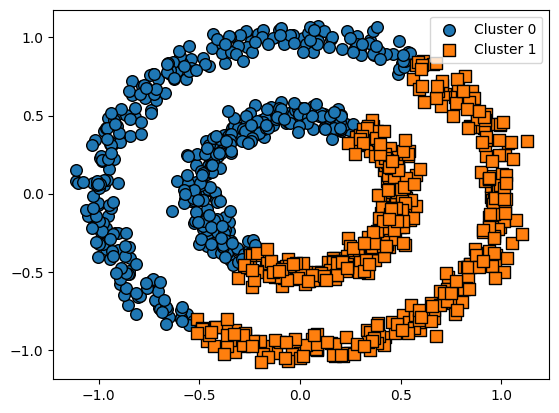

In [55]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False) 

KMeans, GMM 모두 내부와 외부 원 2개로 구성된 복잡한 형태를 군집화하지 못함

DBSCAN으로 군집화 적용

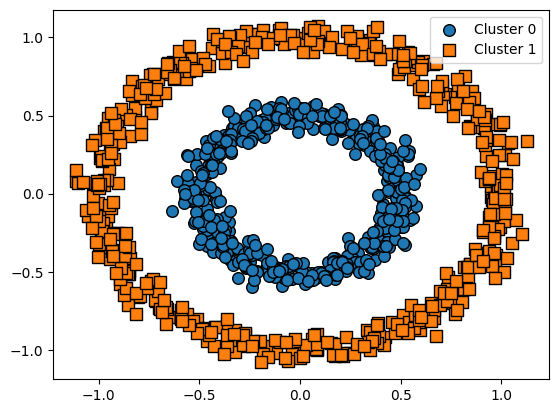

In [56]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False) 

DBSCAN으로 군집화를 적용헀을 때 원하는 방향으로 정확히 수행함

## 06. 군집화 실습 - 고객 세그먼테이션

---
### 고객 세그먼테이션의 정의, 기법
__고객 세그먼테이션(Customer Segmentation)__ : 다양한 기준으로 고객을 분류하는 기법 . CRM이나 마케팅의 중요 기반 요소

- 주요 목표는 타깃 마케팅 > 맞춤형 서비스나 마케팅 제공

- 어떤 요소를 기반으로 군집화할 것인지가 중요 → RFM 기법 이용
    - __RECENCY(R)__: 가장 최근 상품 구입 일에서 오늘까지의 기간
    - __FREQUENCY(F)__: 상품 구매 횟수
    - __MONETARY VALUE(M)__: 총 구매 금액

### 데이터 세트 로딩, 데이터 클렌징

In [59]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df=pd.read_excel(io='/content/drive/My Drive/CUAI_BASIC/Online Retail.xlsx')
retail_df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


__Online Retail : 제품 주문 데이터 세트__
Invoice(주문번호)+StockCode(제품코드)를 기반으로 주문량, 주문일자, 제품단가, 주문고객번호, 주문고객국가 등의 칼럼으로 구성돼 있음

- __InvoiceNo__: 주문 번호, C로 시작하는 것은 취소 주문
- __StockCOde__: 제품 코드(Item Code)
- __Description__: 제품 설명
- __Quantity__: 주문 제품 건수
- __InvoiceDate__: 주문 일자
- __UnitPrice__: 제품 단가
- __CustomerID__: 고객 번호
- __Country__: 국가명(주문 고객의 국적)

---
데이터 세트의 전체 건수, 칼럼 타입, Null 개수 확인

In [60]:
retail_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


전체 데이터 541909개 > CustomID 값의 결측치가 너무 많다. → 사전 정제 작업
- __Null 데이터 제거__: 특히 CustomID가 많음. 고객 세그먼테이션을 수행하기 때문에 고객 식별 번호가 없는 데이터는 필요 없음 > 삭제
- __오류 데이터 삭제__: 대표적인 오류 데이터는 Quantity 또는 UnitPrice가 0보다 작은 경우. <br> Quantity가 0보다 작으면 InvoiceNo의 앞자리가 C이기 때문에 분석의 효율을 위해 삭제!

In [61]:
# 불린 인덱싱으로 Quantity>0 && UnitPrice >0 && CustomerID!=Null 인 값만 필터링
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum() 

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Null 삭제 했더니 전체 데이터가 541909에서 397884로 줄었음

In [62]:
retail_df['Country'].value_counts()[:5] 

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

영국이 주요 주문 고객의 대부분을 차지하므로 다른 국가 데이터 모두 삭제

In [63]:
retail_df=retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape) 

(354321, 8)


최종 데이터는 354321 건으로 줄었음

### RFM 기반 데이터 가공

UnitPrice * Quantity = 주문 금액<br>
CustomerNo (float > int)

In [64]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int) 

Top5 주문 건수와 주문 금액을 가진 고객 데이터 추출

In [65]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5]) 

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


몇 명의 특정 고객이 많은 주문 건수와 주문 금액을 가짐  
주문번호+상품코드 레벨의 식별자로 되어 있어 둘을 groupby하면 1에 가깝게 유일한 식별자 레벨이 됨

In [66]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean() 

1.028702077315023

주문번호+상품코드 기준의 데이터를 고객 기준의 Recnecy, Frequency, Monetary value로 변경

주문번호 기준의 retail_df DF에 groupby('CustomerID')를 적용해 CustomerID 기준의 새로운 DF 생성

새로운 DF에 agg( ) 를 적용해 연산 수행을 쉽게 하도록 → Frequency 고객별 주문건수, Monerary value 고객별 주문금액  
→ slae_amount의 sum( ) agrregation → Recency 두번의 가공 작업 → CustomerID로 groupby, InvoiceDate의 max( )로 고객별 가장 최근 주문일자 가공 후 추후 가공

In [67]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3) 

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


Recency 칼럼은 고객당 가장 최근 주문인데, 값의 특성 때문에 추가 가공 필요  
→ 데이터의 날짜가 101201~111209 이므로 111210에서 빼고 일자 데이터(days)만 추출

In [68]:
cust_df['Recency'].max() 

Timestamp('2011-12-09 12:49:00')

In [69]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3) 

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션

데이터가 소매업체의 대규모 주문도 포함하고 있어 왜곡된 데이터 분포를 가지기 때문에 군집화가 한쪽에만 집중되는 현상이 발생한다. 

직접 확인을 위해 matplotlib의 hist를 이용해 히스토그램으로 확인!

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

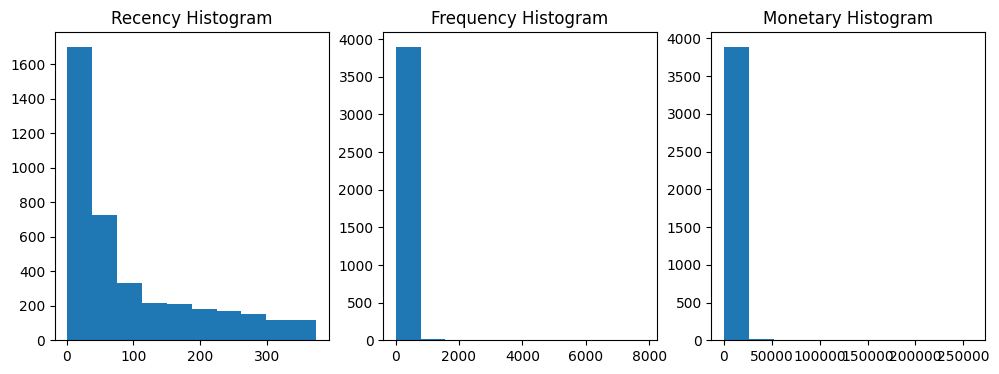

In [70]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary']) 

세 개의 값 모두 왜곡된 분포를 가지고, 특히 Freqeuncy와 Monetary는 심하게 왜곡됨

각 칼럼의 데이터가 어떻게 분포되어 있는지 백분율로 확인

In [71]:
cust_df[['Recency','Frequency','Monetary']].describe() 

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


왜곡 정도가 높은 데이터 세트에  StandardScaler를 적용해 평균과 표준편차 재조정하고 K-평균을 적용

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels))) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.592


군집을 3개로 할 경우 평균 실루엣 계수 스코어가 0.59로 안정적임

visualize_kmeans_plot_multi( ) 함수를 만들고 군집 개수를 2~5개로 변화하면서 실루엣 계수 값, 데이터 구성 확인

In [73]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--") 

In [74]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

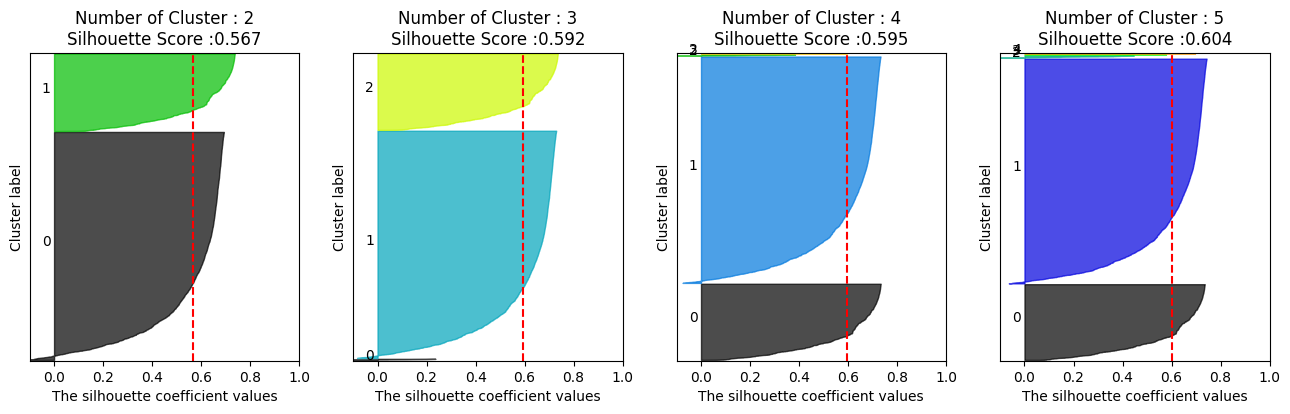

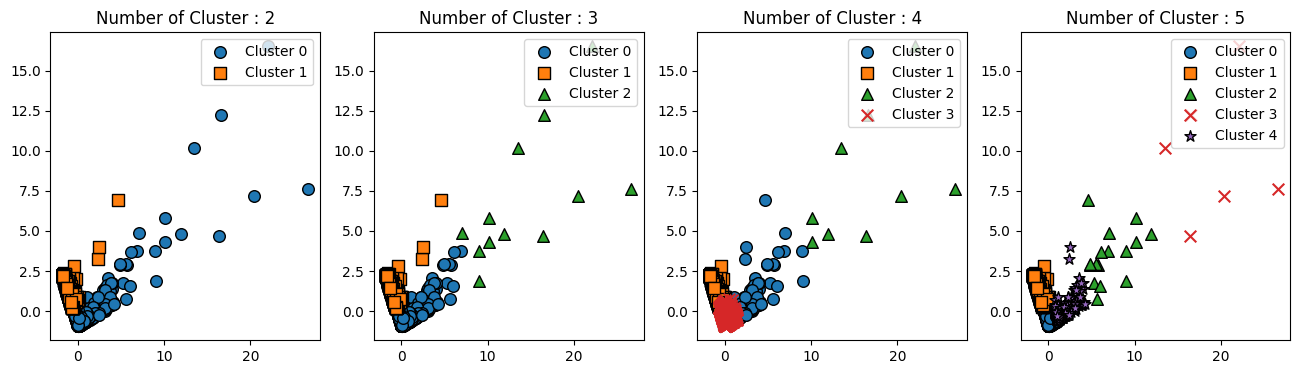

In [75]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled) 

군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것! 새로운 군집 내의 데이터를 분석하고 이해함으로써 집단에 새로운 의미를 부여할 수 있다. 

특이한 데이터 세트를 도출하는 것이 군집화의 목표이지만, 이 정도로 크게 왜곡된 데이터는 군집화를 이용하지 않고도 간단한 로그 변환을 이용하면 된다.

In [76]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels))) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.303


실루엣 스코어는 전보다 떨어지지만, 개별 군집을 더 균일하게 나눌 수 있다. 시각화 해보자!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

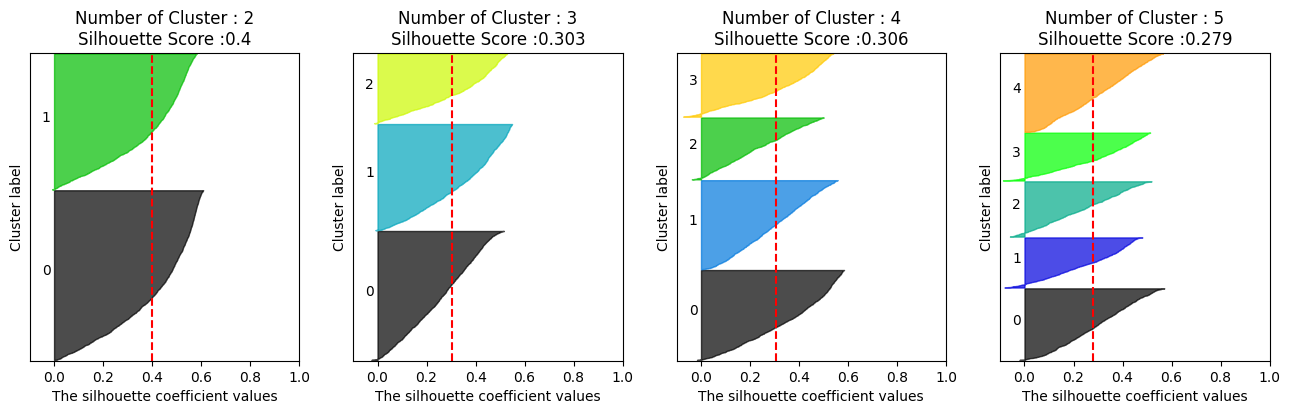

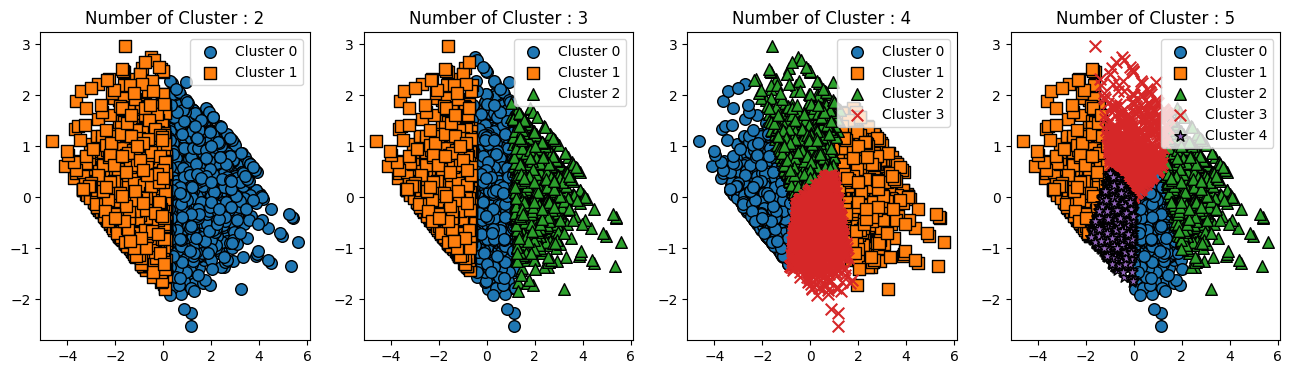

In [77]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled) 

군집화가 더 균일하게 이루어 졌음을 확인할 수 있다. → 이처럼 로그변환을 먼저 취하고 군집화하는 것이 더 나은 결과를 도출할 수 있음